In [0]:
import cv2
import numpy as np
import numpy.linalg as LA

im=cv2.imread('image.png')
cameraPoint=np.array([955,301,1])

K = np.array([[7.2153e+02,0,6.0955e+02],
     [0,7.2153e+02,1.7285e+02],
     [0,0,1]])
ty=-1.65

tTemp=LA.inv(K).dot(cameraPoint) 

[0.47877427 0.17760869 1.        ]


In [0]:
t=tTemp/tTemp[1]*ty
t=np.array(t).reshape(3,1)
h=np.hstack((np.array([[1,0,0],[0,1,0],[0,0,1]]),t))
P=K.dot(h)

pointsforBox=np.array([[0,0,0],
                     [0,1.38,0],
                     [1.51,0,0],
                     [1.51,1.38,0],
                     [1.51,0,-4.10],
                     [1.51,1.38,-4.10],
                     [0,0,-4.10],
                     [0,1.38,-4.10]])

pointsforBox=np.hstack((pointsforBox,np.ones((8,1))))


In [0]:
imageBox=P.dot(pointsforBox.T)
imageBox=imageBox/imageBox[2,:]
print(imageBox)

[[955.         955.         837.72333333 837.72333333 767.85741327
  767.85741327 849.22435246 849.22435246]
 [301.         193.82       301.         193.82       261.76089381
  187.39905535 261.76089381 187.39905535]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]


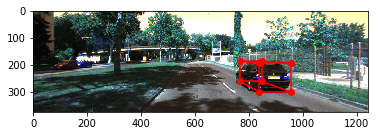

In [0]:
import matplotlib.pyplot as plt
ax=plt.imshow(im)
plt.scatter(imageBox[0,:],imageBox[1,:],c='red')
plt.plot([imageBox[0,0],imageBox[0,1]],[imageBox[1,0],imageBox[1,1]],c='red')
plt.plot([imageBox[0,0],imageBox[0,2]],[imageBox[1,0],imageBox[1,2]],c='red')
plt.plot([imageBox[0,0],imageBox[0,6]],[imageBox[1,0],imageBox[1,6]],c='red')
plt.plot([imageBox[0,1],imageBox[0,3]],[imageBox[1,1],imageBox[1,3]],c='red')
plt.plot([imageBox[0,1],imageBox[0,7]],[imageBox[1,1],imageBox[1,7]],c='red')
plt.plot([imageBox[0,2],imageBox[0,3]],[imageBox[1,2],imageBox[1,3]],c='red')
plt.plot([imageBox[0,2],imageBox[0,4]],[imageBox[1,2],imageBox[1,4]],c='red')
plt.plot([imageBox[0,3],imageBox[0,5]],[imageBox[1,3],imageBox[1,5]],c='red')
plt.plot([imageBox[0,4],imageBox[0,5]],[imageBox[1,4],imageBox[1,5]],c='red')
plt.plot([imageBox[0,4],imageBox[0,6]],[imageBox[1,4],imageBox[1,6]],c='red')
plt.plot([imageBox[0,5],imageBox[0,7]],[imageBox[1,5],imageBox[1,7]],c='red')
plt.plot([imageBox[0,6],imageBox[0,7]],[imageBox[1,6],imageBox[1,7]],c='red')

# Description:

We took a point on bottom right of the car as world "$W$" origin. We take camera's rotation with respect to the world as $I_{3*3}$.

Therefore, $R$ = $I$

Also, $t_{y}$ is provided by the question as $-1.65$.

$t$ = $[t_{x},t_{y},t_{z}]^T$ = $[t_{x},-1.65,t_{z}]^T$

Also, we know that:

$x_{image-coordinates}$ = $K[R|t]X_{world-coordinates}$

Pluging in the values for $R$, $t$, $X$, which is world origin, and taking image pixel co-ordinates from given image.

$x$ = $K*t$

Therefore, $K^{-1}*x=t$

Then, we calculated all the other image co-ordinates using world co-ordinates, using the following equation:

$x$ = $K[R|t]X$